# Rapport du Mini-projet ML

# Réaliser par: LASFER Nisrine

# 1 CHARGEMENT DES BIBLIOTHEQUES ET DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("riceClassification.csv")

# 2 Prétraitement des données

In [3]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


Il est claire qu'on n'a pas de données manquantes, il y'a un total de 12 colonnes et 18185 entrés de données.

In [6]:
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

Pas de valeurs null, notre dataset est bien nettoyer et prête à utiliser.

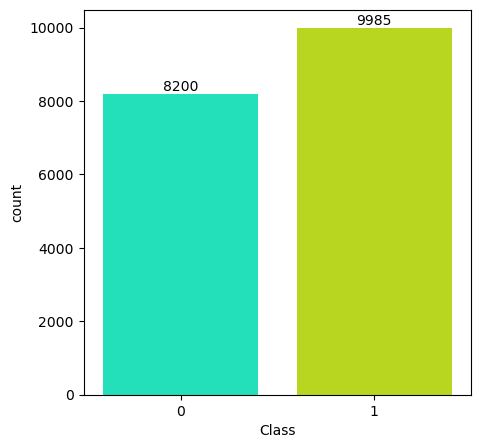

In [7]:
import seaborn as sns
plt.figure(figsize=(5,5))
colors = ['#04FFCD','#CCF500']
ax = sns.countplot(x='Class',data=data,palette=colors)
ax_labels = data['Class'].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=ax_labels)
plt.show()

on a 8200 de class 0 et 9985 de class 1

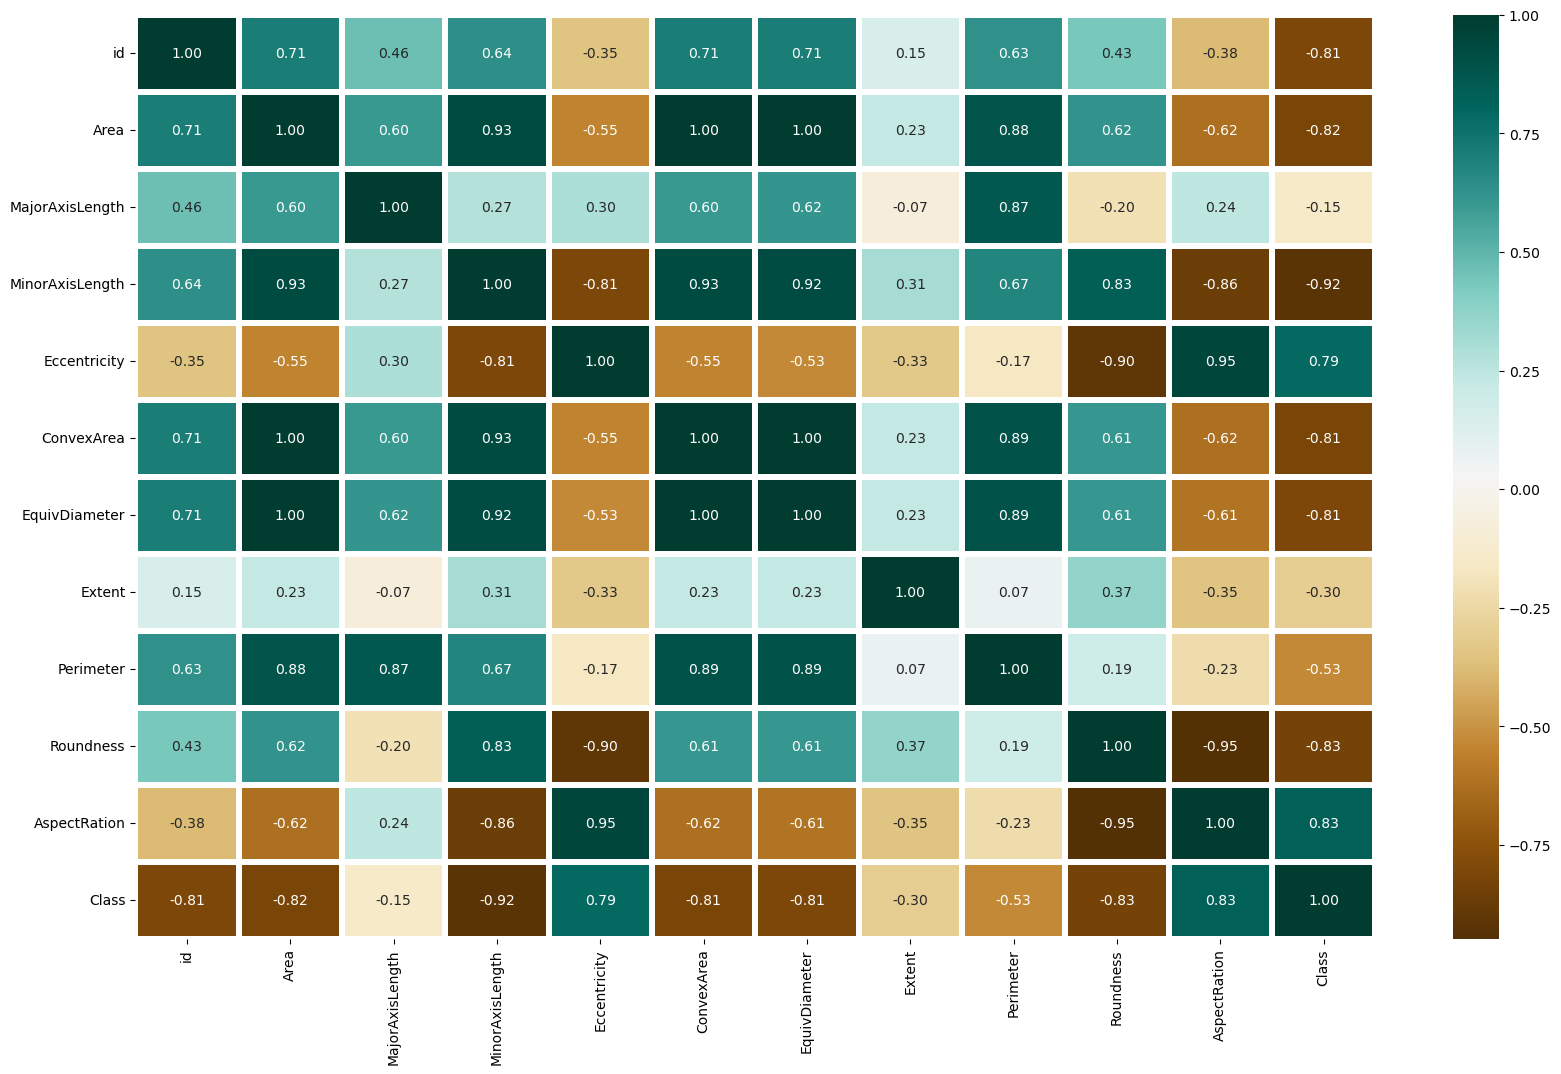

In [8]:
corr = data.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

Le heatmap du correlation nous permet de lister les données corréler entre eux afin d'arriver à bien choisir les features de prédiction, comme c'est clairement marqué que le 'Extent' n'as pas de fort corrélations comme les autres ça nous donne le droit de le supprimer et considérer le reste du features pour la prédiction des classes du Riz.

# 3 DIVISION DES DONNEES

In [9]:
X = data.drop(['Extent','Class'], axis=1)
y = data['Class']

In [10]:
from sklearn.model_selection import train_test_split
# Division en train et test
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#Division des donnes des entrainements en train et validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=42)

# 4 Création du modèle

In [11]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
y_pred = model1.predict(X_val)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score
print("Matrice de confusion :\n", confusion_matrix(y_val, y_pred))
print("Rapport de classification:", classification_report(y_val, y_pred))
print("Accuracy score", accuracy_score(y_val, y_pred))
print("Precision score", precision_score(y_val, y_pred))
print("f1 Score:", f1_score(y_val, y_pred))

Matrice de confusion :
 [[2561    3]
 [   0 3165]]
Rapport de classification:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2564
           1       1.00      1.00      1.00      3165

    accuracy                           1.00      5729
   macro avg       1.00      1.00      1.00      5729
weighted avg       1.00      1.00      1.00      5729

Accuracy score 0.9994763484028626
Precision score 0.9990530303030303
f1 Score: 0.9995262908574135


In [13]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=1000)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [14]:
y_pred1 = model2.predict(X_val)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score
print("Matrice de confusion :\n", confusion_matrix(y_val, y_pred1))
print("Rapport de classification:", classification_report(y_val, y_pred1))
print("Accuracy score", accuracy_score(y_val, y_pred1))
print("Precision score", precision_score(y_val, y_pred1))
print("f1 Score:", f1_score(y_val, y_pred1))

Matrice de confusion :
 [[2564    0]
 [   0 3165]]
Rapport de classification:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2564
           1       1.00      1.00      1.00      3165

    accuracy                           1.00      5729
   macro avg       1.00      1.00      1.00      5729
weighted avg       1.00      1.00      1.00      5729

Accuracy score 1.0
Precision score 1.0
f1 Score: 1.0


In [15]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred2 = model3.predict(X_val)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score
print("Matrice de confusion :\n", confusion_matrix(y_val, y_pred2))
print("Rapport de classification:", classification_report(y_val, y_pred2))
print("Accuracy score", accuracy_score(y_val, y_pred2))
print("Precision score", precision_score(y_val, y_pred2))
print("f1 Score:", f1_score(y_val, y_pred2))

Matrice de confusion :
 [[2564    0]
 [   0 3165]]
Rapport de classification:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2564
           1       1.00      1.00      1.00      3165

    accuracy                           1.00      5729
   macro avg       1.00      1.00      1.00      5729
weighted avg       1.00      1.00      1.00      5729

Accuracy score 1.0
Precision score 1.0
f1 Score: 1.0


In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [18]:
y_pred3 = sgd_clf.predict(X_val)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score
print("Matrice de confusion :\n", confusion_matrix(y_val, y_pred3))
print("Rapport de classification:", classification_report(y_val, y_pred3))
print("Accuracy score", accuracy_score(y_val, y_pred3))
print("Precision score", precision_score(y_val, y_pred3))
print("f1 Score:", f1_score(y_val, y_pred3))

Matrice de confusion :
 [[2504   60]
 [   0 3165]]
Rapport de classification:               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2564
           1       0.98      1.00      0.99      3165

    accuracy                           0.99      5729
   macro avg       0.99      0.99      0.99      5729
weighted avg       0.99      0.99      0.99      5729

Accuracy score 0.9895269680572526
Precision score 0.9813953488372092
f1 Score: 0.9906103286384975


Cross validation sur les modeles

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
modeles = [
    ('Decision trees', model1),
    ('Random forest', model2),
    ('Logistic Regression', model3),
    ('SGDClassifier', sgd_clf)
]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for nom, modele in modeles:
    scores = cross_val_score(modele, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"{nom}{scores.mean():}")

Decision trees0.9999059708509638
Random forest1.0
Logistic Regression0.9999059708509638
SGDClassifier0.9462189500549683


In [20]:
#GRID SEARCH CV DE RANDOM FOREST
from sklearn.model_selection import GridSearchCV
param_grid_model1 = {'n_estimators': [100, 200, 500], 'max_depth':[10, 20, 30]}
grid = GridSearchCV(model2, param_grid_model1, cv=5)
grid.fit(X_train, y_train)
print("Meilleur hyperparamètre : ", grid.best_params_)
print("Accuracy: ", grid.best_score_)

Meilleur hyperparamètre :  {'max_depth': 10, 'n_estimators': 100}
Accuracy:  1.0


# Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=sgd_clf, n_estimators=100)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9909233723162856

# Boosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.9998254494676209

# 5 prédictions sur les données extrapolées 

In [23]:
y_predc = model1.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score
print("Matrice de confusion :\n", confusion_matrix(y_test, y_predc))
print("Rapport de classification:", classification_report(y_test, y_predc))
print("Accuracy score", accuracy_score(y_test, y_predc))
print("Precision score", precision_score(y_test, y_predc))
print("f1 Score:", f1_score(y_test, y_predc))

Matrice de confusion :
 [[819   1]
 [  0 999]]
Rapport de classification:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       999

    accuracy                           1.00      1819
   macro avg       1.00      1.00      1.00      1819
weighted avg       1.00      1.00      1.00      1819

Accuracy score 0.999450247388675
Precision score 0.999
f1 Score: 0.9994997498749374


In [24]:
data_predit = pd.DataFrame(y_predc,columns=['Prédictions'])
data_predit.to_csv('predictions.csv')
data_predit

,Prédictions
0,0
1,1
2,0
3,1
4,1
...,...
1814,1
1815,0
1816,0
1817,0


# 6 Visualisation des données

<AxesSubplot:xlabel='Area', ylabel='MajorAxisLength'>

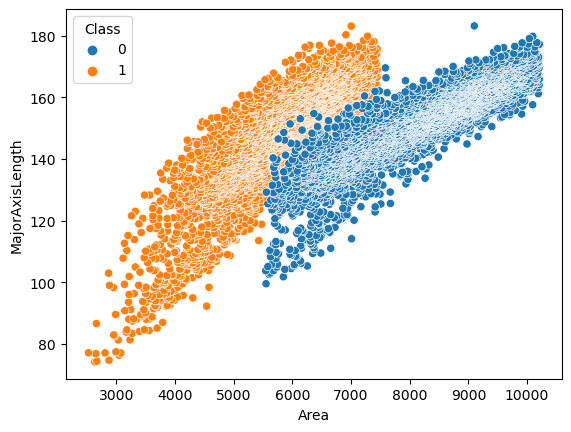

In [25]:
sns.scatterplot(x="Area", y="MajorAxisLength", data=data, hue="Class")

<AxesSubplot:xlabel='Area', ylabel='Perimeter'>

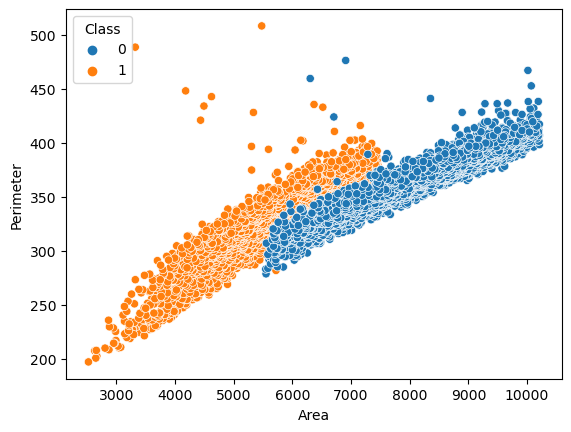

In [26]:
sns.scatterplot(x="Area", y="Perimeter", data=data, hue="Class")

<AxesSubplot:xlabel='Area', ylabel='Roundness'>

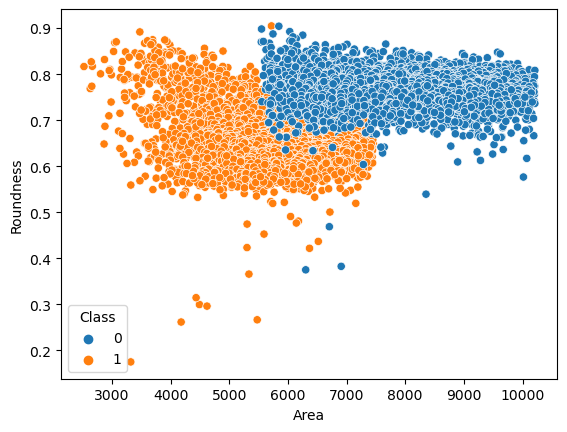

In [27]:
sns.scatterplot(x="Area", y="Roundness", data=data, hue="Class")